In [64]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import random
import matplotlib.pyplot as plt

In [1]:
# import processed data 
new_train = pd.read_csv('we_data/new_train.csv')
new_validation = pd.read_csv('we_data/new_validation.csv')
new_test = pd.read_csv('we_data/new_test.csv')

<font face="Tahoma" size=5 color=#000000> 

In [2]:
basebid = 190
avgCTR= 0.0007375623256619447
XG_test = pd.read_csv('we_data/XG_test.csv')

bidprices = LinearStrategy(XG_test, basebid, avgCTR)

# reverse back
Group_17 = pd.DataFrame(data = list(zip(test["bidid"], bidprices)),
                               columns = ["bidid", "bidprice"])
Group_17.to_csv("Group_17.csv")

<font face="Tahoma" size=5 color=#000000> get  reverse bid

In [28]:
test_x = test.drop(['click','bidprice','payprice'],axis=1)
reversed_test = test_x.iloc[::-1]

In [20]:
basebids = np.linspace(20, 350, 100)
avgCTR= (train.loc[(train['click']==1)].click.sum())/train.shape[0]

In [21]:
def LinearStrategy(pCTR, base_bid,avgCTR):
    avgCTR = np.repeat(avgCTR*100, pCTR.shape[0])
    base_bid =  np.repeat(base_bid, pCTR.shape[0])
    bidprices  = (base_bid * pCTR['pCTR'])/ avgCTR
    return bidprices


In [51]:
#re-train base bid
def Evaluate(validation, pre_bidprices):
    
    bidprice = pre_bidprices
    budget = 6250000

    #find who wins the bid
    payprice = validation['payprice'].values
    win_bid = bidprice>payprice

    spend = np.cumsum(payprice*win_bid)
    enough_budget = spend<budget


    click =  np.sum(validation['click'].values*win_bid*enough_budget)
    impression = np.sum(win_bid*enough_budget)
    spend = np.max(spend*enough_budget)
    ctr = click/impression*100
    cpm = spend/impression*1000
    cpc = spend/click


    return [impression,click, ctr, spend, cpm, cpc]  


Text(0,0.5,'cpc')

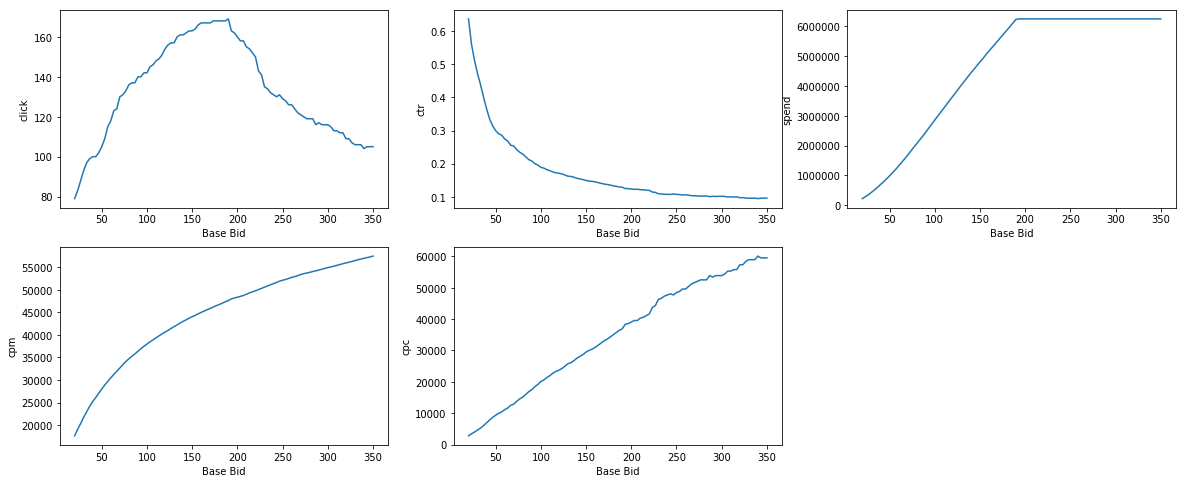

In [59]:
plt.figure(figsize = (20,8))

plt.subplot(2,3,1)
plt.plot(results['basebid'], results["click"])
plt.xlabel("Base Bid")
plt.ylabel("click")

plt.subplot(2,3,2)
plt.plot(results['basebid'], results["ctr"])
plt.xlabel("Base Bid")
plt.ylabel("ctr")


plt.subplot(2,3,3)
plt.plot(results['basebid'], results["spend"])
plt.xlabel("Base Bid")
plt.ylabel("spend")

plt.subplot(2,3,4)
plt.plot(results['basebid'], results["cpm"])
plt.xlabel("Base Bid")
plt.ylabel("cpm")


plt.subplot(2,3,5)
plt.plot(results['basebid'], results["cpc"])       
plt.xlabel("Base Bid")
plt.ylabel("cpc")

In [53]:

k=0
results  = pd.DataFrame(columns = ["basebid","impression","click","ctr","spend","cpm","cpc"])     

# get predict  CTR
XG_validation = pd.read_csv('we_data/XGboosting_pCTR.csv').iloc[::-1]
validation = validation.iloc[::-1]
basebids = np.linspace(20, 350, 100)

for basebid in basebids:
    pre_bidprices = LinearStrategy(XG_validation, basebid, avgCTR = 0.0007375623256619447)
    impression, click, ctr, spend, cpm, cpc = Evaluate(validation, pre_bidprices)
    results.loc[k]  = np.round(basebid,5) , impression, click, ctr, spend, cpm, cpc
    k = k+1

print(results)

/anaconda3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:180: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


      basebid  impression  click       ctr      spend           cpm  \
0    20.00000     12415.0   79.0  0.636327   219147.0  17651.792187   
1    23.33333     14832.0   83.0  0.559601   283302.0  19100.728155   
2    26.66667     17215.0   88.0  0.511182   350589.0  20365.320941   
3    30.00000     19732.0   93.0  0.471316   429630.0  21773.261707   
4    33.33333     22160.0   97.0  0.437726   509273.0  22981.633574   
5    36.66667     24710.0   99.0  0.400648   598117.0  24205.463375   
6    40.00000     27351.0  100.0  0.365617   690740.0  25254.652481   
7    43.33333     29879.0  100.0  0.334683   780554.0  26123.832792   
8    46.66667     32448.0  102.0  0.314349   879079.0  27091.931706   
9    50.00000     35028.0  105.0  0.299760   980854.0  28001.998401   
10   53.33333     37572.0  109.0  0.290110  1086160.0  28908.761844   
11   56.66667     40197.0  115.0  0.286091  1193884.0  29700.823445   
12   60.00000     42978.0  118.0  0.274559  1311205.0  30508.748662   
13   6

In [4]:
# plotResult(result)

In [55]:
results.loc[(results['click'] == 169)]

,basebid,impression,click,ctr,spend,cpm,cpc
51,190.0,130980.0,169.0,0.129027,6235867.0,47609.306764,36898.621302


In [3]:
basebid = 190
avgCTR= 0.0007375623256619447
XG_test = pd.read_csv('we_data/XG_test.csv').iloc[::-1]

bidprices = LinearStrategy(XG_test, basebid, avgCTR)
bidprices_back = bidprices.iloc[::-1]

# reverse back
Group_17 = pd.DataFrame(data = list(zip(test["bidid"], bidprices_back)), columns = ["bidid", "bidprice"])
Group_17.to_csv("Group_17.csv")

In [57]:
bidprices

303374      8.849221
303373     42.088781
303372     21.955945
303371     10.602134
303370     19.037553
303369     24.659227
303368    294.253165
303367     25.554448
303366     28.422998
303365     20.257133
303364     71.314076
303363     68.361646
303362     83.721044
303361     39.652028
303360     38.314008
303359     28.758313
303358     33.418718
303357     24.524940
303356    161.397204
303355     23.059080
303354     39.514241
303353    465.952896
303352    269.973190
303351    108.051372
303350     23.963521
303349     60.133840
303348     22.119566
303347     44.717477
303346    128.348808
303345     51.661456
             ...    
29         19.394614
28         51.539667
27         61.656999
26         35.630266
25        118.268307
24          4.188430
23         23.331859
22         22.055255
21         96.890242
20         11.434582
19         57.073170
18         38.570924
17         24.477749
16         44.056442
15         19.534617
14        117.474538
13         47